In [23]:
import numpy as np
import json
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import os

In [ ]:
with open('/home/shared/hsc/roman_lsst/lsst_data/annotations_lvl2/train.json', 'r') as f:
    dtrain = json.load(f)
    
with open('/home/shared/hsc/roman_lsst/lsst_data/annotations_lvl2/val.json', 'r') as f:
    dval = json.load(f)

In [3]:
dtrain[0]['annotations'][0].keys()

dict_keys(['obj_id', 'obj_truth_idx', 'category_id', 'bbox', 'bbox_mode', 'area', 'segmentation', 'ra', 'dec', 'redshift', 'size_true', 'ellipticity_1_true', 'ellipticity_2_true', 'mag_u', 'flux_u', 'mag_g', 'flux_g', 'mag_r', 'flux_r', 'mag_i', 'flux_i', 'mag_z', 'flux_z', 'mag_y', 'flux_y'])

In [68]:
zs = []
mags = []
for d in dtrain:
    for a in d['annotations']:
        zs.append(a['redshift'])
        mags.append(a['mag_i'])
        
zs = np.array(zs)
mags = np.array(mags)

print(len(zs))

56557


In [70]:
len(np.where(mags<25.3)[0])

29408

(array([3311., 4781., 6083., 4945., 2901., 1561., 1088.,  363.,  178.,
          56.]),
 array([0.        , 0.30272834, 0.60545669, 0.90818503, 1.21091337,
        1.51364172, 1.81637006, 2.1190984 , 2.42182674, 2.72455509,
        3.02728343]),
 <BarContainer object of 10 artists>)

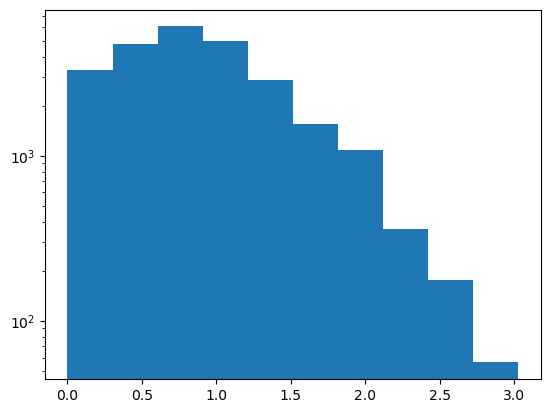

In [12]:

plt.hist(zs,log=True)

In [13]:
len(zs)

25267

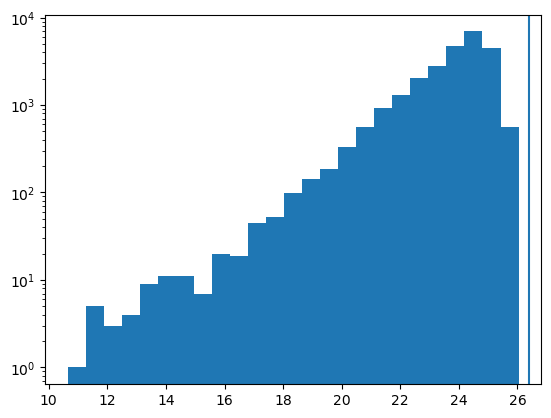

In [14]:
plt.hist(mags,log=True,bins=25);
plt.axvline(26.4)

In [4]:
import os
import matplotlib.colors as colors

In [96]:
with open('/home/g4merz/DeepDISC_Roman_Rubin/data/annotations_lvl2_ups_train_clean.json', 'r') as f:
    dtrain = json.load(f)
    
with open('/home/shared/hsc/roman_lsst/lsst_data/annotations_lvl2/test.json', 'r') as f:
    dtest = json.load(f)

In [97]:
def rubin_key_mapper(d):    
    fn = d['file_name']
    return os.path.join('/home/shared/hsc/roman_lsst/',fn)


def combined_key_mapper(d):
    
    suffix = d['file_name'].split('./lsst_data/truth-ups/')[1][4:]
    return suffix

In [ ]:
wmax = 0
for d in dtest:
    img = np.load(rubin_key_mapper(d))
    if img.shape[-1] > wmax:
        wmax = img.shape[-1]
        
wmax

In [62]:
imgf = rubin_key_mapper(dtrain[0])
rubinim = np.load(imgf)
romanim = np.load('/home/shared/hsc/roman_lsst/roman_data/truth/54.24_-38.3/full_c138_54.24_-38.3.npy')


In [94]:
rubinim.shape

NameError: name 'rubinim' is not defined

In [63]:
suffix = dtrain[107]['file_name'].split('./lsst_data/truth-ups/')[1][4:]

rubinim = np.load('/home/shared/hsc/roman_lsst/./lsst_data/truth-ups/dc2_'+suffix)
romanim = np.load(os.path.join('/home/shared/hsc/roman_lsst/roman_data/truth/',suffix))

In [74]:
means = []
stds = []
for d in dval:
    
    suffix = combined_key_mapper(d)
    rubinim = np.load('/home/shared/hsc/roman_lsst/./lsst_data/truth-ups/dc2_'+suffix)
    romanim = np.load(os.path.join('/home/shared/hsc/roman_lsst/roman_data/truth/',suffix))    
    
    image = np.vstack((rubinim,romanim))
    means.append(np.mean(image))
    stds.append(np.std(image))
    
    #means.append(np.mean(np.load(rubin_key_mapper(d))))
    #stds.append(np.std(np.load(rubin_key_mapper(d))))
    
means = np.array(means)
stds = np.array(stds)

In [69]:
np.mean(means), np.mean(stds)

(nan, nan)

In [76]:
badinds

array([0])

In [77]:
badinds = np.where(np.isnan(stds))[0]

dnew = []

for i in range(len(dval)):
    if i in badinds:
        continue
    dnew.append(dval[i])



In [78]:
len(dval), len(dnew)

(333, 332)

In [79]:
with open('/home/g4merz/DeepDISC_Roman_Rubin/data/annotations_lvl2_ups_val_clean.json', 'w') as f:
    json.dump(dnew,f)

In [60]:
with open('/home/shared/hsc/roman_lsst/lsst_data/annotations_lvl2/test.json', 'r') as f:
    dtest = json.load(f)

In [61]:
def rubin_truth_key_mapper(d):    
    fn = d['file_name']
    fnsub = fn.split('/')[-1].split('.npy')[0]
    fnsubrename = 'truth'+fnsub[4:]
    return os.path.join('/home/shared/hsc/roman_lsst/',*fn.split('/')[:-1])+'/'+fnsubrename+'.json'


In [62]:
dtrain[0]['file_name']
#truth_c135_54.24_-38.3.json


fn = dtrain[0]['file_name']
fnsub = fn.split('/')[-1].split('.npy')[0]
fnsubrename = 'truth'+fnsub[4:]
fnsubrename

fn

ftest = rubin_truth_key_mapper(dtrain[0])
ftest



'/home/shared/hsc/roman_lsst/./lsst_data/truth/dc2_54.24_-38.3/truth_c138_54.24_-38.3.json'

In [63]:
with open(ftest, 'r') as f:
    dtruth = json.load(f)

    
mags = []
ids = []
zs = []

for d in dtest:
    ftest = rubin_truth_key_mapper(d)
    with open(ftest, 'r') as f:
        dtruth = json.load(f)

    for o in dtruth:
        mags.append(o['mag_i'])
        zs.append(o['redshift'])
        ids.append(o['id'])

In [64]:
mags = np.array(mags)
ids = np.array(ids)
zs = np.array(zs)

In [65]:
dtruth_test = pd.DataFrame({'object_id':ids,'mag_i':mags,'z':zs})

In [66]:
dtruth_test.to_csv('/home/g4merz/DeepDISC_Roman_Rubin/data/dtest_truth.csv')

In [52]:
dtest[0]['annotations'][0]

{'obj_id': 8627637986,
 'obj_truth_idx': 0,
 'category_id': 0,
 'bbox': [29.405405044555664,
  351.1351318359375,
  44.97297668457031,
  44.97296142578125],
 'bbox_mode': 1,
 'area': 169,
 'segmentation': [[48,
   366,
   44,
   370,
   44,
   380,
   48,
   384,
   58,
   384,
   62,
   380,
   62,
   370,
   58,
   366]],
 'ra': 50.8930300971,
 'dec': -38.8344241704,
 'redshift': 1.0443942547,
 'size_true': 0.0526439029,
 'ellipticity_1_true': -0.1569699198,
 'ellipticity_2_true': 0.1128496528,
 'mag_u': 26.1721324921,
 'flux_u': 123.3521499634,
 'mag_g': 26.2427177429,
 'flux_g': 115.587890625,
 'mag_r': 26.2366867065,
 'flux_r': 116.2319107056,
 'mag_i': 25.9873847961,
 'flux_i': 146.2332458496,
 'mag_z': 25.5734272003,
 'flux_z': 214.106048584,
 'mag_y': 25.5634536743,
 'flux_y': 216.0816955566}